Inventory Policy: Periodic Replenishment
Source: https://towardsdatascience.com/make-your-inventory-simulation-in-python-9cb950da8cf3

In [2]:
import numpy as np
# This section is used to define consumer demand and is therefore completely
# hypothetical.
# This data should be a forecast of demand, which will allow inventory mgmt.
time = 200 # periods e.g. days, months.
d_mu = 100 # demand average
d_std = 25 # demand standard deviation
d = np.maximum(np.random.normal(d_mu, d_std, time).round(0).astype(int),0)
# d=demand array over "time" timesteps
# Normally distributed and strictly positive

print(d)

[ 38 113 122  76 100 137  95  85  58  50  88 117  86 103 119  90 144  81
 122 137 102  89 103 133 122  97  88 142 144 103  74 142 149  92 148 114
 120 129 137 101 119 108  80 121 113 116  42 119  82 112  15 128 119  93
 127 103 151 106 101  35 114  73 147 129 137  91  99 118  53 128  94 121
 112 118 100  91 112  62 108 106 106  98 129  68 100  90  75 153 123  63
 118 147 107  96  99 146  76 120  86  92 116 154 140 114  85  84 113 104
  72 117 123 119  53 108 131  78 100 123 110 133 100  94 102 105 100  64
  69 100 171  70  87 125 136  99 119  98 148  57 104 144  75 119 109 114
 133  53  62  83  88 105 105  91  79  77 124 113  67  99 117 134 102  93
 117  98 128  92  97 136  51 115  85 136  86 143  74  87 135  70 120  82
  85 124  96 139 127 123 104  74 126 119 106 115  99 104  89  81  97 142
  89  89]


In [7]:
from scipy.stats import norm
L, R, alpha = 4, 1, 0.95 
z = norm.ppf(alpha) 
# z is equivalent to the value marking where 95% of data points would be
# contained if the data is a normal distribution.  It functions as a 
# standard deviation multiplier.
x_std = np.sqrt(L+R)*d_std
# x_std = demand deviation over the risk horizon.
# L+R = risk horizon, this is the maximum period of time to wait for an order.  
# During this period inventory is at risk of being depleted. 

print(z)
print(x_std)


1.6448536269514722
55.90169943749474


In [8]:
Ss = np.round(x_std*z).astype(int) 
# Ss = Safety stock.  Stock protecting the supply chain against demand variability 
# (or forecast error) and lack of reliability of supply.
# x_std*z represents the margin of error (significance level used when estimating 
# a population parameter with a sample statistic) for the risk horizon.  It is 
# the demand deviation over the risk horizon, multiplied by the standard
# deviation multiplier and results in what is known as the interval value
Cs = 1/2 * d_mu * R
# Cs = Cycle stock.  Stock needed to fulfill the expected demand (or forecast) over
# a replenishment cycle. 
Is = d_mu * L 
# Is = In-transit stock.  Inventory in transit in between different locations.
# Usually these are goods ordered from a supplier but not yet available in 
# our warehouse for our clients to buy.
S = Ss + 2*Cs + Is
# Define this still...

print(Ss)
print(Cs)
print(Is)
print(S)




92
50.0
400
592.0


In [29]:
hand = np.zeros(time, dtype=int) 
transit = np.zeros((time,L+1), dtype=int)

print(hand)
print(transit)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 

In [30]:
stock_out_period = np.full(time, False, dtype=bool)
stock_out_cycle = []

In [31]:
hand[0] = S - d[0]
transit[1,-1] = d[0]

print(hand)
print(transit)

[489   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[[  0   0   0   0   0]
 [  0   0   0   0 103]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 

In [32]:
for t in range(1,time): 
  if transit[t-1,0]>0:
    stock_out_cycle.append(stock_out_period[t-1]) 
  hand[t] = hand[t-1] - d[t] + transit[t-1,0] 
  stock_out_period[t] = hand[t] < 0
  transit[t,:-1] = transit[t-1,1:]
  if 0==t%R: 
    net = hand[t] + transit[t].sum() 
    transit[t,L] = S - net

     Demand  On−hand                In−transit
5       100       -1   [144, 193, 89, 67, 100]
6        60       83    [193, 89, 67, 100, 60]
7       123      153    [89, 67, 100, 60, 123]
8       131      111   [67, 100, 60, 123, 131]
9       126       52  [100, 60, 123, 131, 126]
..      ...      ...                       ...
195     122      133   [117, 50, 68, 102, 122]
196     123      127   [50, 68, 102, 122, 123]
197      74      103   [68, 102, 122, 123, 74]
198      89       82   [102, 122, 123, 74, 89]
199      74      110    [122, 123, 74, 89, 74]

[195 rows x 3 columns]


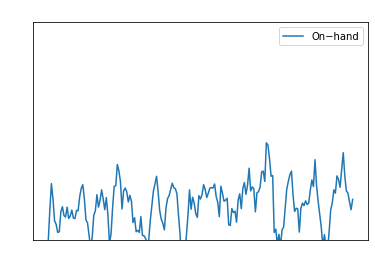

In [53]:
import pandas as pd
import matplotlib
df = pd.DataFrame(data= {'Demand':d, 'On-hand':hand, 'In-transit':list(transit)}) 
df = df.iloc[R+L:,:] #Remove initialization periods 
print(df)
plt = df['On-hand'].plot(title='Inventory Policy (%d,%d)' %(R,S), ylim=(0,S), legend=True )
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.title.set_color('white')

In [24]:
print('Alpha:',alpha*100)
SL_alpha = 1-sum(stock_out_cycle)/len(stock_out_cycle)
print('Cycle Service Level:', round(SL_alpha*100,1))
SL_period = 1-sum(stock_out_period)/time
print('Period Service Level:', round(SL_period*100,1))

Alpha: 95.0
Cycle Service Level: 74.6
Period Service Level: 63.5
